In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv


# Reading Data

In [3]:
df = pd.read_csv("/kaggle/input/who-is-the-real-winner/train.csv")
dfTest = pd.read_csv("/kaggle/input/who-is-the-real-winner/test.csv")
df

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...,...,...
2054,2054,V. Sasi,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional
2055,2055,Pushkar Lal Dangi,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass
2056,2056,Dr. Manju Shiwach,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate
2057,2057,Mansing Fattesingrao Naik,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass


# Dropping Irrelevant columns

In [4]:
def Dr(value):
    if 'Dr.' in value:
        return True
    else:
        return False

def Adv(value):
    if 'Adv.' in value:
        return True
    else:
        return False

df['Dr'] = df['Candidate'].apply(Dr)
df['Adv'] = df['Candidate'].apply(Adv)
dfTest['Dr'] = dfTest['Candidate'].apply(Dr)
dfTest['Adv'] = dfTest['Candidate'].apply(Adv)

df = df.drop(columns=['Candidate','Constituency ∇'])
dfTest = dfTest.drop(columns=['Candidate','Constituency ∇'])

In [5]:
df.head(50)

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Education,Dr,Adv
0,0,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass,False,False
1,1,BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass,False,False
2,2,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate,True,False
3,3,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate,False,False
4,4,BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass,False,False
5,5,AITC,0,3 Crore+,29 Lac+,WEST BENGAL,Graduate Professional,False,False
6,6,BJP,0,2 Crore+,0,UTTAR PRADESH,Post Graduate,False,False
7,7,AAP,1,9 Crore+,2 Crore+,PUNJAB,Graduate,False,False
8,8,SP,1,5 Crore+,35 Lac+,UTTAR PRADESH,Post Graduate,False,False
9,9,BJP,6,22 Crore+,2 Crore+,MAHARASHTRA,Graduate,False,False


# Checking Null Values

In [6]:
df.isnull().sum()

# We can clearly see that our data set do not contain null values so we need not handle those cases

ID               0
Party            0
Criminal Case    0
Total Assets     0
Liabilities      0
state            0
Education        0
Dr               0
Adv              0
dtype: int64

# Sample Submission based on Most Recurring Value

In [6]:
df1 = df.copy()
df1['Education'].value_counts()

Education
Graduate                 531
Post Graduate            432
12th Pass                349
Graduate Professional    339
10th Pass                227
8th Pass                  78
Doctorate                 52
Others                    28
Literate                  14
5th Pass                   9
Name: count, dtype: int64

In [7]:
dfTest1 = dfTest.copy()
dfTest1['Education'] = 'Graduate'


In [8]:
dfTest

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Dr,Adv
0,0,IND,2,70 Crore+,11 Crore+,MAHARASHTRA,False,False
1,1,AITC,1,2 Crore+,13 Lac+,WEST BENGAL,False,False
2,2,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA,False,False
3,3,AITC,1,2 Crore+,0,WEST BENGAL,False,False
4,4,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH,False,False
...,...,...,...,...,...,...,...,...
1369,1369,BJP,0,1 Crore+,0,WEST BENGAL,False,False
1370,1370,BJD,1,0,13 Lac+,ODISHA,False,False
1371,1371,INC,1,5 Crore+,0,BIHAR,False,False
1372,1372,BJP,1,2 Crore+,5 Lac+,HIMACHAL PRADESH,False,False


In [9]:
dfTest1[['ID','Education']].to_csv('ModeSubmission.csv', index=False)

# Data Exploration

## Data Types

In [10]:
df.dtypes

ID                int64
Party            object
Criminal Case     int64
Total Assets     object
Liabilities      object
state            object
Education        object
Dr                 bool
Adv                bool
dtype: object

In [11]:
# Basic statistics
print(df.describe())

                ID  Criminal Case
count  2059.000000    2059.000000
mean   1029.000000       1.777562
std     594.526422       4.762183
min       0.000000       0.000000
25%     514.500000       0.000000
50%    1029.000000       0.000000
75%    1543.500000       2.000000
max    2058.000000      87.000000


In [12]:
print(df['Party'].value_counts())

Party
BJP                         862
INC                         365
AITC                        130
AAP                          94
YSRCP                        86
DMK                          73
BJD                          65
SP                           62
CPI(M)                       43
RJD                          42
IND                          38
NCP                          34
AIADMK                       34
JD(U)                        32
SHS                          29
NPP                          20
JMM                          14
NDPP                          9
TDP                           8
JD(S)                         7
Sikkim Krantikari Morcha      5
CPI                           4
Tipra Motha Party             3
Name: count, dtype: int64


In [13]:
df['Total Assets'].head(40)

0     211 Crore+
1       1 Crore+
2       7 Crore+
3       9 Crore+
4       2 Crore+
5       3 Crore+
6       2 Crore+
7       9 Crore+
8       5 Crore+
9      22 Crore+
10             0
11      1 Crore+
12      7 Crore+
13      3 Crore+
14      8 Crore+
15      1 Crore+
16     12 Crore+
17     63 Crore+
18       11 Lac+
19      1 Crore+
20     31 Crore+
21             0
22       60 Lac+
23             0
24     11 Crore+
25      1 Crore+
26      5 Crore+
27      9 Crore+
28     17 Crore+
29      3 Crore+
30       18 Lac+
31      8 Crore+
32     41 Crore+
33      4 Crore+
34      6 Crore+
35       95 Lac+
36      6 Crore+
37      6 Crore+
38      6 Crore+
39      9 Crore+
Name: Total Assets, dtype: object

In [14]:
df['Criminal Case'].value_counts()

Criminal Case
0     1135
1      368
2      165
3      102
4       68
5       53
6       36
7       32
8       17
9       16
10       9
12       7
11       7
13       5
18       5
16       4
22       4
25       3
14       3
38       2
29       2
52       2
19       2
30       1
43       1
24       1
49       1
17       1
87       1
23       1
15       1
26       1
27       1
73       1
34       1
Name: count, dtype: int64

<Axes: xlabel='Criminal Case'>

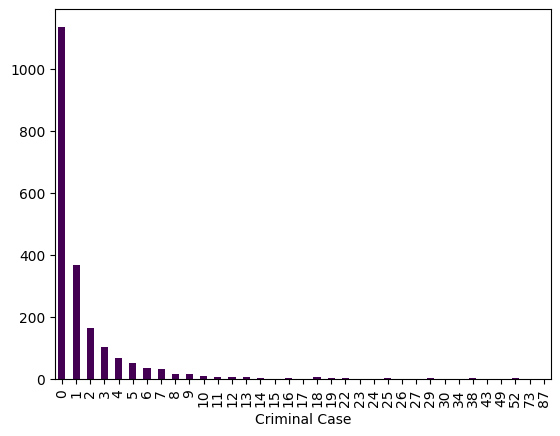

In [15]:
import matplotlib.pyplot as plt

df['Criminal Case'].value_counts().sort_index().plot(kind='bar',cmap='viridis')

In [5]:
# Converting The values of Assets and Liabilities into numerical data

def Numerical(value):
    if 'Crore+' in value:
        return int(value.split()[0])*100000
    elif 'Lac+' in value:
        return int(value.split()[0])*1000
    elif 'Thou+' in value:
        return int(value.split()[0])*10
    elif 'Hund+' in value:
        return int(value.split()[0])*1
    else:
        return int(value)
    
df['Total Assets'] = df['Total Assets'].apply(Numerical)
dfTest['Total Assets'] = dfTest['Total Assets'].apply(Numerical)
df['Liabilities'] = df['Liabilities'].apply(Numerical)
dfTest['Liabilities'] = dfTest['Liabilities'].apply(Numerical)

In [8]:
df.head(60)

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Education,Dr,Adv
0,0,DMK,4,21100000,200000,TAMIL NADU,8th Pass,False,False
1,1,BJP,0,100000,0,MADHYA PRADESH,12th Pass,False,False
2,2,INC,0,700000,22000,KARNATAKA,Post Graduate,True,False
3,3,BJP,0,900000,24000,BIHAR,Post Graduate,False,False
4,4,BJP,2,200000,61000,WEST BENGAL,8th Pass,False,False
5,5,AITC,0,300000,29000,WEST BENGAL,Graduate Professional,False,False
6,6,BJP,0,200000,0,UTTAR PRADESH,Post Graduate,False,False
7,7,AAP,1,900000,200000,PUNJAB,Graduate,False,False
8,8,SP,1,500000,35000,UTTAR PRADESH,Post Graduate,False,False
9,9,BJP,6,2200000,200000,MAHARASHTRA,Graduate,False,False


# Applying Decision Tree

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
df.dtypes

ID                int64
Party            object
Criminal Case     int64
Total Assets      int64
Liabilities       int64
state            object
Education        object
Dr                 bool
Adv                bool
dtype: object

In [20]:
df2 = df.copy()
dfTest2 = dfTest.copy()

X = df2.drop('Education', axis=1)  # Features
y = df2['Education']  # Target variable

categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert the encoded array to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded_df], axis=1)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(
    criterion='entropy',           # Measure quality of splits: 'gini' or 'entropy' (for classification)
    splitter='best',             # Split strategy: 'best' (default) or 'random'
    max_depth=40,                  # Maximum depth of the tree (e.g., 10)
    min_samples_split=5,           # Minimum samples required to split a node (e.g., 5)
    min_samples_leaf=2,            # Minimum samples required at a leaf node (e.g., 2)
    max_features='sqrt',           # Number of features to consider for each split (e.g., 'sqrt')
    random_state=42,               # Seed for reproducibility
    max_leaf_nodes=15,             # Maximum number of leaf nodes (e.g., 15)
)

# Define the number of folds for cross-validation
n_folds = 5  # Adjust the number of folds as needed

# Create a KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

[0.26941748 0.26213592 0.25       0.25970874 0.23357664]
0.2549677556516193
0.012368607530885508


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

In [22]:
# conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix

In [23]:
# class_report = classification_report(y_test, y_pred)
# class_report

In [24]:
df3 = df.copy()
dfTest3 = dfTest.copy()

X = df3.drop('Education', axis=1)  # Features
y = df3['Education']  # Target variable
X1 = dfTest3.copy()

In [25]:
X1

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Dr,Adv
0,0,IND,2,7000000,1100000,MAHARASHTRA,False,False
1,1,AITC,1,200000,13000,WEST BENGAL,False,False
2,2,NCP,3,4900000,100000,MAHARASHTRA,False,False
3,3,AITC,1,200000,0,WEST BENGAL,False,False
4,4,SP,0,1600000,200000,UTTAR PRADESH,False,False
...,...,...,...,...,...,...,...,...
1369,1369,BJP,0,100000,0,WEST BENGAL,False,False
1370,1370,BJD,1,0,13000,ODISHA,False,False
1371,1371,INC,1,500000,0,BIHAR,False,False
1372,1372,BJP,1,200000,5000,HIMACHAL PRADESH,False,False


In [26]:
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded1 = encoder.fit_transform(X1[categorical_cols])

# Convert the encoded array to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_encoded_df1 = pd.DataFrame(X_encoded1, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded_df], axis=1)
X1 = pd.concat([X1.drop(categorical_cols, axis=1), X_encoded_df1], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
X1.columns

Index(['ID', 'Criminal Case', 'Total Assets', 'Liabilities', 'Dr', 'Adv',
       'Party_AIADMK', 'Party_AITC', 'Party_BJD', 'Party_BJP', 'Party_CPI',
       'Party_CPI(M)', 'Party_DMK', 'Party_INC', 'Party_IND', 'Party_JD(S)',
       'Party_JD(U)', 'Party_JMM', 'Party_NCP', 'Party_NDPP', 'Party_NPP',
       'Party_RJD', 'Party_SHS', 'Party_SP', 'Party_Sikkim Krantikari Morcha',
       'Party_TDP', 'Party_Tipra Motha Party', 'Party_YSRCP',
       'state_ARUNACHAL PRADESH', 'state_ASSAM', 'state_BIHAR',
       'state_CHHATTISGARH', 'state_DELHI', 'state_GOA', 'state_GUJARAT',
       'state_HARYANA', 'state_HIMACHAL PRADESH', 'state_JHARKHAND',
       'state_KARNATAKA', 'state_KERALA', 'state_MADHYA PRADESH',
       'state_MAHARASHTRA', 'state_MANIPUR', 'state_MEGHALAYA',
       'state_NAGALAND', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_SIKKIM', 'state_TAMIL NADU', 'state_TRIPURA',
       'state_UTTAR PRADESH', 'state_UTTARAKHAND', 'state_WEST B

In [28]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(
    criterion='entropy',           # Measure quality of splits: 'gini' or 'entropy' (for classification)
    splitter='best',             # Split strategy: 'best' (default) or 'random'
    max_depth=40,                  # Maximum depth of the tree (e.g., 10)
    min_samples_split=5,           # Minimum samples required to split a node (e.g., 5)
    min_samples_leaf=2,            # Minimum samples required at a leaf node (e.g., 2)
    max_features='sqrt',           # Number of features to consider for each split (e.g., 'sqrt')
    random_state=42,               # Seed for reproducibility
    max_leaf_nodes=15,             # Maximum number of leaf nodes (e.g., 15)
)

clf.fit(X, y)

# Step 3: Model Evaluation
y_pred = clf.predict(X1)
df_pred = pd.DataFrame(y_pred, columns=["Education"])
df_pred.to_csv('submission_DecisionTree.csv', index_label='ID')

In [50]:
df4 = df.copy()
dfTest4 = dfTest.copy()

# df4['Diff'] = df4['Total Assets'] - df4['Liabilities']
# dfTest4['Diff'] = dfTest4['Total Assets'] - dfTest4['Liabilities']

# df4.drop(columns = ['Total Assets','Liabilities'], axis=1)
# df4.drop(columns = ['Total Assets'], axis=1)
# dfTest4.drop(columns = ['Total Assets'], axis=1)
# dfTest4.drop(columns = ['Total Assets','Liabilities'], axis=1)

X = df4.drop('Education', axis=1).copy()  # Features
y = df4['Education'].copy()  # Target variable
X1 = dfTest4.copy()

categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded1 = encoder.fit_transform(X1[categorical_cols])

# Convert the encoded array to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_encoded_df1 = pd.DataFrame(X_encoded1, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded_df], axis=1)
X1 = pd.concat([X1.drop(categorical_cols, axis=1), X_encoded_df1], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
# Create a Decision Tree classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=80,  # Number of boosting stages (trees)
    learning_rate=0.2,  # Step size at each boosting stage
    max_depth=28,  # Maximum depth of individual trees
    random_state=42  # Seed for reproducibility
)

# Define the number of folds for cross-validation
n_folds = 4  # Adjust the number of folds as needed

# Create a KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(gb_classifier, X, y, cv=kf, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

[0.22912621 0.17669903 0.20970874 0.20038911]
0.20398077141022253
0.018856672502455613


In [31]:
X['Diff']

0       20900000
1         100000
2         678000
3         876000
4         139000
          ...   
2054       51000
2055      192000
2056     1215000
2057     2406000
2058       11000
Name: Diff, Length: 2059, dtype: int64

In [48]:
# Create a Decision Tree classifier
rf_classifier1 = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=40,
    min_samples_split=8,
    min_samples_leaf=1,
    # min_weight_fraction_leaf=0.0,
    max_features=10,
    # max_leaf_nodes=None,
    # min_impurity_decrease=0.0,
    # bootstrap=True,
    # oob_score=False,
    # n_jobs=None,
    random_state=42,
    # verbose=1,
    # warm_start=False,
    # class_weight=None,
    # ccp_alpha=0.0,
    # max_samples=None
    )


# Define the number of folds for cross-validation
n_folds = 10  # Adjust the number of folds as needed

# Create a KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_classifier1, X, y, cv=kf, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

[0.24757282 0.23786408 0.23786408 0.20873786 0.25728155 0.25728155
 0.2961165  0.24757282 0.22330097 0.21463415]
0.2428226379351172
0.023853968412566356


In [33]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Measure quality of splits
    'max_depth': [20, 40],  # Maximum depth of trees
    'min_samples_split': [2, 5],  # Minimum samples to split a node
    'min_samples_leaf': [2, 4],  # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],  # Features to consider for each split
}

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X, y)

# Retrieve the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


KeyboardInterrupt: 

In [ ]:
best_params

In [ ]:
best_model.fit(X, y)

# Step 3: Model Evaluation
y_pred1 = best_model.predict(X1)
df_pred1 = pd.DataFrame(y_pred1, columns=["Education"])
df_pred1.to_csv('submission_RandomForest_Diff_GridSearch.csv', index_label='ID')

In [ ]:
rf_classifier1.fit(X, y)

# Step 3: Model Evaluation
y_pred1 = rf_classifier1.predict(X1)
df_pred1 = pd.DataFrame(y_pred1, columns=["Education"])
df_pred1.to_csv('submission_RandomForest_Diff_1.csv', index_label='ID')

In [37]:
gb_classifier.fit(X, y)

# Step 3: Model Evaluation
y_pred1 = gb_classifier.predict(X1)
df_pred1 = pd.DataFrame(y_pred1, columns=["Education"])


In [38]:
df_pred1.to_csv('submission_GradientBoosting.csv', index_label='ID')

In [52]:
from xgboost import XGBClassifier

In [17]:
df5 = df.copy()
dfTest5 = dfTest.copy()

df5['Diff'] = df5['Total Assets'] - df5['Liabilities']
dfTest5['Diff'] = dfTest5['Total Assets'] - dfTest5['Liabilities']

# df4.drop(columns = ['Total Assets','Liabilities'], axis=1)
# df4.drop(columns = ['Total Assets'], axis=1)
# dfTest4.drop(columns = ['Total Assets'], axis=1)
# dfTest4.drop(columns = ['Total Assets','Liabilities'], axis=1)

Xq = df5.drop('Education', axis=1).copy()  # Features
yq = df5['Education'].copy()  # Target variable
X1q = dfTest5.copy()

categorical_cols = Xq.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(Xq[categorical_cols])
X_encoded1 = encoder.fit_transform(X1q[categorical_cols])

# Convert the encoded array to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_encoded_df1 = pd.DataFrame(X_encoded1, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded_df], axis=1)
X1 = pd.concat([X1.drop(categorical_cols, axis=1), X_encoded_df1], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyError: "['Party', 'state'] not found in axis"

In [87]:
from sklearn.preprocessing import LabelEncoder

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(
    n_estimators=46,  # Number of boosting rounds
    learning_rate=0.05,  # Step size for boosting rounds
    max_depth=2,  # Maximum depth of a tree
    random_state=40,  # Seed for reproducibility
    use_label_encoder=False  # Set to False to avoid warning about label encoder deprecation
)

label_encoder = LabelEncoder()

# Fit the label encoder on the target variable and transform the target variable
y_lencoded = label_encoder.fit_transform(y)

# Create a KFold cross-validator
kf = KFold(n_splits = 6, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_classifier, X, y_lencoded, cv=kf, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

[0.27616279 0.24489796 0.26822157 0.26239067 0.27696793 0.29446064]
0.2705169277013131
0.015135107508880327


In [89]:


xgb_classifier.fit(X, y_lencoded)

# Step 3: Model Evaluation
y_pred2 = xgb_classifier.predict(X1)
df_pred2 = pd.DataFrame(y_pred2, columns=["Education"])

df_pred1.to_csv('submission_XGradientBoosting.csv', index_label='ID')

In [101]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # Weak classifier
    n_estimators=76,  # Number of weak classifiers to use in the ensemble
    learning_rate=0.1,  # Step size at each boosting round
    random_state=42  # Random state for reproducibility
)

kf1 = KFold(n_splits = 6, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(adaboost, X, y_lencoded, cv=kf1, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

[0.28197674 0.26822157 0.24198251 0.27113703 0.26822157 0.27113703]
0.2671127421068095
0.01216083880908485


In [102]:
adaboost.fit(X, y_lencoded)

# Step 3: Model Evaluation
y_pred2 = adaboost.predict(X1)
df_pred2 = pd.DataFrame(y_pred2, columns=["Education"])

df_pred1.to_csv('submission_AdaBoosting.csv', index_label='ID')

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [1]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [13]:
# Create the base classifier (binary classifier)
base_classifier = LinearSVC(dual=False, random_state=42, class_weight = 'balanced')

# Create the OneVsOneClassifier with the base classifier
ovo_classifier = OneVsOneClassifier(base_classifier)

In [14]:
kf1 = KFold(n_splits = 6, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(ovo_classifier, X, y, cv=kf1, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

[0.0755814  0.06122449 0.07580175 0.04664723 0.05539359 0.0728863 ]
0.06458912468641942
0.011054307697598825


In [64]:
df5 = df.copy()
dfTest5 = dfTest.copy()

df5['Diff'] = df5['Total Assets'] - df5['Liabilities']
dfTest5['Diff'] = dfTest5['Total Assets'] - dfTest5['Liabilities']

# df4.drop(columns = ['Total Assets','Liabilities'], axis=1)
# df4.drop(columns = ['Total Assets'], axis=1)
# dfTest4.drop(columns = ['Total Assets'], axis=1)
# dfTest4.drop(columns = ['Total Assets','Liabilities'], axis=1)


In [21]:
df5

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Education,Dr,Adv,Diff
0,0,DMK,4,21100000,200000,TAMIL NADU,8th Pass,False,False,20900000
1,1,BJP,0,100000,0,MADHYA PRADESH,12th Pass,False,False,100000
2,2,INC,0,700000,22000,KARNATAKA,Post Graduate,True,False,678000
3,3,BJP,0,900000,24000,BIHAR,Post Graduate,False,False,876000
4,4,BJP,2,200000,61000,WEST BENGAL,8th Pass,False,False,139000
...,...,...,...,...,...,...,...,...,...,...
2054,2054,CPI,1,61000,10000,KERALA,Graduate Professional,False,False,51000
2055,2055,INC,0,200000,8000,RAJASTHAN,10th Pass,False,False,192000
2056,2056,BJP,0,1300000,85000,UTTAR PRADESH,Graduate,True,False,1215000
2057,2057,NCP,1,2500000,94000,MAHARASHTRA,12th Pass,False,False,2406000


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer

In [65]:
# Convert numerical columns to categories using binning
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df5['Total Assets'] = discretizer.fit_transform(df5[['Total Assets']])
df5['Liabilities'] = discretizer.fit_transform(df5[['Liabilities']])
df5['Criminal Case'] = discretizer.fit_transform(df5[['Criminal Case']])

# One-hot encode categorical columns (Party and State)
df5 = pd.get_dummies(df5, columns=['Party', 'state'])

# Split data into features and labels

X = df5.drop(columns=['Education','Diff'])  # Replace 'Your_Label_Column' with the column name of the target variable
y = df5['Education']  # Replace 'Your_Label_Column' with the column name of the target variable

dfTest5['Total Assets'] = discretizer.fit_transform(dfTest5[['Total Assets']])
dfTest5['Liabilities'] = discretizer.fit_transform(dfTest5[['Liabilities']])
dfTest5['Criminal Case'] = discretizer.fit_transform(dfTest5[['Criminal Case']])

# One-hot encode categorical columns (Party and State)
dfTest5 = pd.get_dummies(dfTest5, columns=['Party', 'state'])

# Split data into features and labels

XTest = dfTest5.drop(columns=['Diff'])  # Replace 'Your_Label_Column' with the column name of the target variable
# y = df5['Education']  # Replace 'Your_Label_Column' with t

In [33]:
set(X['Criminal Case'])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0, 11.0}

In [71]:
model = MultinomialNB(alpha = 0.65, fit_prior = True)


kf1 = KFold(n_splits = 5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf1, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

[0.24757282 0.22572816 0.22330097 0.24514563 0.24574209]
0.237497933054591
0.010658687618606106


In [67]:
model.fit(X, y)

# Step 3: Model Evaluation
y_pred2 = model.predict(XTest)
df_pred2 = pd.DataFrame(y_pred2, columns=["Education"])

df_pred2.to_csv('submission_MultiNomial.csv', index_label='ID')

# Reworking of the Data with Log Scaling of Assets and Outlier removed

In [176]:
df_train1 = pd.read_csv("/kaggle/input/who-is-the-real-winner/train.csv")
df_test1 = pd.read_csv("/kaggle/input/who-is-the-real-winner/test.csv")
df_train1

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...,...,...
2054,2054,V. Sasi,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional
2055,2055,Pushkar Lal Dangi,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass
2056,2056,Dr. Manju Shiwach,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate
2057,2057,Mansing Fattesingrao Naik,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass


In [177]:
def Dr(value):
    if 'Dr.' in value:
        return True
    else:
        return False

def Adv(value):
    if 'Adv.' in value:
        return True
    else:
        return False

def SC(value):
    if '(SC)' in value:
        return True
    else:
        return False

def ST(value):
    if '(ST)' in value:
        return True
    else:
        return False

df_train1['Dr'] = df_train1['Candidate'].apply(Dr)
df_train1['Adv'] = df_train1['Candidate'].apply(Adv)
df_test1['Dr'] = df_test1['Candidate'].apply(Dr)
df_test1['Adv'] = df_test1['Candidate'].apply(Adv)

df_train1['SC'] = df_train1['Constituency ∇'].apply(SC)
df_train1['ST'] = df_train1['Constituency ∇'].apply(ST)
df_test1['SC'] = df_test1['Constituency ∇'].apply(SC)
df_test1['ST'] = df_test1['Constituency ∇'].apply(ST)

df_train1 = df_train1.drop(columns=['Candidate','Constituency ∇'])
df_test1 = df_test1.drop(columns=['Candidate','Constituency ∇'])

In [19]:
df_train1

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Education,Dr,Adv,SC,ST
0,0,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass,False,False,False,False
1,1,BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass,False,False,True,False
2,2,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate,True,False,False,False
3,3,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate,False,False,False,False
4,4,BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2054,2054,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional,False,False,False,False
2055,2055,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass,False,False,False,False
2056,2056,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate,True,False,False,False
2057,2057,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass,False,False,False,False


In [178]:

def Numerical(value):
    if 'Crore+' in value:
        return int(3 * np.log10(int(value.split()[0])*100000))
    elif 'Lac+' in value:
        return int(3 * np.log10(int(value.split()[0])*1000))
    elif 'Thou+' in value:
        return int(3 * np.log10(int(value.split()[0])*10))
    elif 'Hund+' in value:
        return int(3 * np.log10(int(value.split()[0])*1))
    else:
        return int(value)
    
def Numerical1(value):
    if 'Crore+' in value:
        return int(value.split()[0])*100000
    elif 'Lac+' in value:
        return int(value.split()[0])*1000
    elif 'Thou+' in value:
        return int(value.split()[0])*10
    elif 'Hund+' in value:
        return int(value.split()[0])*1
    else:
        return int(value)
df_train1['Total Assets'] = df_train1['Total Assets'].apply(Numerical1)
df_test1['Total Assets'] = df_test1['Total Assets'].apply(Numerical1)
df_train1['Liabilities'] = df_train1['Liabilities'].apply(Numerical1)
df_test1['Liabilities'] = df_test1['Liabilities'].apply(Numerical1)

In [179]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.2 * IQR
    upper_bound = Q3 + 2.2 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_train1 = remove_outliers(df_train1, 'Criminal Case')
df_train1 = remove_outliers(df_train1, 'Total Assets')
df_train1 = remove_outliers(df_train1, 'Liabilities')

In [180]:
set(df_train1['Criminal Case'])


{0, 1, 2, 3, 4, 5}

In [181]:
df_train = df_train1.copy()
df_test = df_test1.copy()

# Convert numerical columns to categories using binning
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
df_train['Total Assets'] = discretizer.fit_transform(df_train[['Total Assets']])
df_train['Liabilities'] = discretizer.fit_transform(df_train[['Liabilities']])
df_train['Criminal Case'] = discretizer1.fit_transform(df_train[['Criminal Case']])

# One-hot encode categorical columns (Party and State)
df_train = pd.get_dummies(df_train, columns=['Party', 'state'])

# Split data into features and labels

X = df_train.drop(columns=['Education'])  # Replace 'Your_Label_Column' with the column name of the target variable
y = df_train['Education']  # Replace 'Your_Label_Column' with the column name of the target variable

df_test['Total Assets'] = discretizer.fit_transform(df_test[['Total Assets']])
df_test['Liabilities'] = discretizer.fit_transform(df_test[['Liabilities']])
df_test['Criminal Case'] = discretizer.fit_transform(df_test[['Criminal Case']])

# One-hot encode categorical columns (Party and State)
df_test = pd.get_dummies(df_test, columns=['Party', 'state'])

# Split data into features and labels

XTest = df_test  # Replace 'Your_Label_Column' with the column name of the target variable
# y = df5['Education']  # Replace 'Your_Label_Column' with t

In [182]:
model = MultinomialNB(alpha = 0.55, fit_prior = True)


kf1 = KFold(n_splits = 5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf1, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

[0.2254902  0.25163399 0.2124183  0.26143791 0.26143791]
0.24248366013071893
0.019974780117563568


In [183]:
model.fit(X, y)

# Step 3: Model Evaluation
y_pred2 = model.predict(XTest)
df_pred2 = pd.DataFrame(y_pred2, columns=["Education"])

df_pred2.to_csv('MultiNomial_12.csv', index_label='ID')

In [23]:

filtered_df = df_train[df_train['Adv'] == True]

In [24]:
filtered_df

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Education,Dr,Adv,SC,ST
39,39,INC,10,900000,8000,MAHARASHTRA,Graduate Professional,False,True,False,False
70,70,CPI(M),7,200000,0,KERALA,Graduate Professional,False,True,False,False
157,157,CPI,0,200000,1000,KERALA,Graduate Professional,False,True,False,False
217,217,CPI,3,100000,11000,KERALA,Graduate Professional,False,True,False,False
333,333,CPI(M),7,36000,14000,KERALA,Graduate Professional,False,True,False,False
374,374,INC,8,21000,39000,KERALA,Graduate Professional,False,True,False,False
382,382,IND,0,100000,0,KERALA,Graduate Professional,False,True,False,False
408,408,CPI(M),0,37000,5000,KERALA,Graduate Professional,False,True,False,False
541,541,INC,14,100000,69000,KERALA,Graduate Professional,False,True,False,False
1055,1055,CPI(M),1,59000,14000,KERALA,Graduate Professional,False,True,False,False


In [15]:
filtered_df1 = df[df['Dr'] == True]
filtered_df1

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Education,Dr,Adv
2,2,INC,0,700000,22000,KARNATAKA,Post Graduate,True,False
109,109,BJP,0,1100000,34000,RAJASTHAN,Graduate Professional,True,False
184,184,BJP,0,100000,100000,BIHAR,Doctorate,True,False
194,194,BJP,4,200000,80000,MADHYA PRADESH,Doctorate,True,False
195,195,RJD,4,0,0,BIHAR,Doctorate,True,False
300,300,BJP,1,400000,0,UTTAR PRADESH,Graduate Professional,True,False
318,318,BJP,0,600000,200000,MADHYA PRADESH,Post Graduate,True,False
361,361,BJP,0,500000,81000,HIMACHAL PRADESH,Post Graduate,True,False
375,375,IND,0,400000,200000,KERALA,Post Graduate,True,False
381,381,BJP,0,700000,100000,MANIPUR,Doctorate,True,False


In [16]:
filtered_df1 = df[df['Sc'] == True]
filtered_df1

KeyError: 'Sc'

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [18]:
df6 = df_train.copy()
dfTest6 = df_test.copy()

X = df6.drop(columns='Education')  # Replace 'Your_Label_Column' with the target label
y = df6['Education']
X_test = dfTest6



In [11]:
from sklearn.model_selection import train_test_split

In [22]:
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes model
model = GaussianNB(priors=None, var_smoothing=1e-9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 5.58%
                       precision    recall  f1-score   support

            10th Pass       0.17      0.02      0.04        49
            12th Pass       0.11      0.01      0.03        67
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        20
            Doctorate       0.03      0.79      0.06        14
             Graduate       0.27      0.03      0.05       108
Graduate Professional       0.14      0.11      0.12        66
             Literate       0.00      0.00      0.00         3
               Others       0.00      0.00      0.00         4
        Post Graduate       0.00      0.00      0.00        80

             accuracy                           0.06       412
            macro avg       0.07      0.10      0.03       412
         weighted avg       0.13      0.06      0.04       412



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

In [46]:
binarizer = Binarizer(threshold=0.5)

df6 = df_train.copy()
dfTest6 = df_test.copy()

In [47]:
y = df6['Education']
df6 = df6.drop(columns = ['Education'])

In [48]:
categorical_cols = df6.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(df6[categorical_cols])

# Convert the encoded array to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame
df6 = pd.concat([X.drop(categorical_cols, axis=1), X_encoded_df], axis=1)

df6

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID,Criminal Case,Total Assets,Liabilities,Dr,Adv,SC,ST,Party_AIADMK,Party_AITC,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,0,4,21100000,200000,False,False,False,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0,100000,0,False,False,True,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,700000,22000,True,False,False,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,900000,24000,False,False,False,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2,200000,61000,False,False,True,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2054,1,61000,10000,False,False,False,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,2055,0,200000,8000,False,False,False,False,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2056,2056,0,1300000,85000,True,False,False,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2057,2057,1,2500000,94000,False,False,False,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y

0                    8th Pass
1                   12th Pass
2               Post Graduate
3               Post Graduate
4                    8th Pass
                ...          
2054    Graduate Professional
2055                10th Pass
2056                 Graduate
2057                12th Pass
2058                 Graduate
Name: Education, Length: 2059, dtype: object

In [50]:
X_train = binarizer.fit_transform(df6)
X_test = binarizer.transform(dfTest6)

In [53]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [50]:
# Initialize the Bernoulli Naive Bayes model
model = BernoulliNB()

kf1 = KFold(n_splits = 5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X_train, y, cv=kf1, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(scores)
print(mean_accuracy)
print(std_accuracy)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Party
- state
Feature names seen at fit time, yet now missing:
- Party_AIADMK
- Party_AITC
- Party_BJD
- Party_BJP
- Party_CPI
- ...
